<a href="https://colab.research.google.com/github/chahatpatel2003/CSCI-167/blob/main/notebook4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

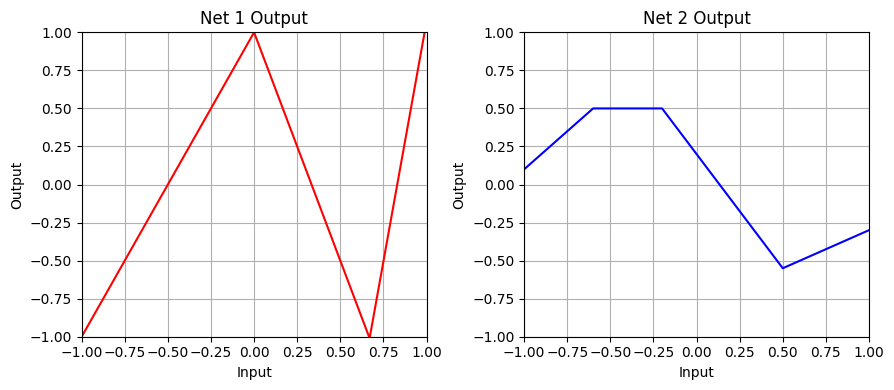

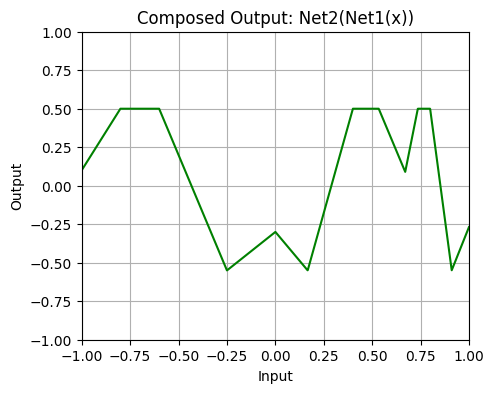

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def ReLU(x):
    return np.clip(x, 0.0, None)

def shallow_net(x, activation_fn,
                phi_0, phi_1, phi_2, phi_3,
                theta_10, theta_11,
                theta_20, theta_21,
                theta_30, theta_31):
    pre_1 = theta_10 + theta_11 * x
    pre_2 = theta_20 + theta_21 * x
    pre_3 = theta_30 + theta_31 * x

    act_1 = activation_fn(pre_1)
    act_2 = activation_fn(pre_2)
    act_3 = activation_fn(pre_3)

    w_act_1 = phi_1 * act_1
    w_act_2 = phi_2 * act_2
    w_act_3 = phi_3 * act_3

    y = phi_0 + w_act_1 + w_act_2 + w_act_3

    return y

def plot_neural_outputs(x_vals, net1_out, net2_out, net12_out=None):
    fig, ax = plt.subplots(1, 2, figsize=(9, 4))
    ax[0].plot(x_vals, net1_out, 'r-')
    ax[0].set_title("Net 1 Output")
    ax[0].set_xlabel("Input")
    ax[0].set_ylabel("Output")
    ax[0].grid(True)
    ax[0].set_xlim([-1, 1])
    ax[0].set_ylim([-1, 1])

    ax[1].plot(x_vals, net2_out, 'b-')
    ax[1].set_title("Net 2 Output")
    ax[1].set_xlabel("Input")
    ax[1].set_ylabel("Output")
    ax[1].grid(True)
    ax[1].set_xlim([-1, 1])
    ax[1].set_ylim([-1, 1])

    plt.tight_layout()
    plt.show()

    if net12_out is not None:
        plt.figure(figsize=(5, 4))
        plt.plot(x_vals, net12_out, 'g-')
        plt.title("Composed Output: Net2(Net1(x))")
        plt.xlabel("Input")
        plt.ylabel("Output")
        plt.grid(True)
        plt.xlim([-1, 1])
        plt.ylim([-1, 1])
        plt.show()


net1_theta = [0.0, -1.0,  0.0, 1.0, -0.67, 1.0]
net1_phi   = [1.0, -2.0, -3.0, 9.3]


net2_theta = [-0.6, -1.0, 0.2, 1.0, -0.5, 1.0]
net2_phi   = [0.5, -1.0, -1.5, 2.0]

x_vals = np.arange(-1, 1, 0.001)

net1_out = shallow_net(x_vals, ReLU, *net1_phi, *net1_theta)
net2_out = shallow_net(x_vals, ReLU, *net2_phi, *net2_theta)
net12_out = shallow_net(net1_out, ReLU, *net2_phi, *net2_theta)

plot_neural_outputs(x_vals, net1_out, net2_out, net12_out)
